## Importing the libraries

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

## Loading and preprocessing database

In [32]:
df = pd.read_csv('../Bases de dados/csv_result-ebay_confianca_completo.csv')

In [33]:
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [34]:
df.reputation.unique()

array(['Bom', 'Ruim'], dtype=object)

In [35]:
np.unique(df.reputation, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

<AxesSubplot: xlabel='reputation', ylabel='count'>

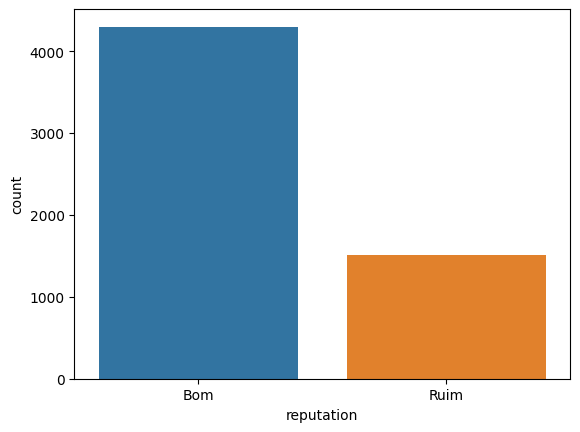

In [36]:
sns.countplot(x=df.reputation)

In [37]:
df.reputation = df.reputation.apply(lambda x: 0 if x == 'Bom' else 1)


In [38]:
df.reputation

2       0
3       0
4       0
5       0
6       0
       ..
5803    0
5804    1
5805    0
5806    1
5807    1
Name: reputation, Length: 5806, dtype: int64

In [40]:
df.blacklist.unique()

array(['N', 'B'], dtype=object)

In [41]:
np.unique(df.blacklist, return_counts=True)

(array(['B', 'N'], dtype=object), array([ 784, 5022]))

<AxesSubplot: xlabel='blacklist', ylabel='count'>

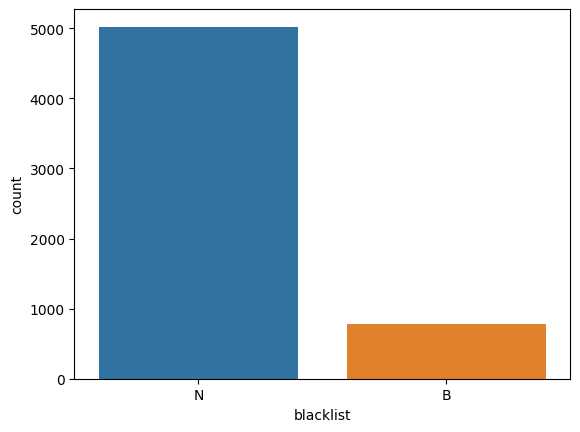

In [43]:
sns.countplot(x=df.blacklist)

In [46]:
df.blacklist = df.blacklist.apply(lambda x : 0 if x == 'N' else 1)

In [47]:
df_y = df.pop('reputation')
df_x = df

In [48]:
df_y

2       0
3       0
4       0
5       0
6       0
       ..
5803    0
5804    1
5805    0
5806    1
5807    1
Name: reputation, Length: 5806, dtype: int64

In [49]:
df_x.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence
2,0,49,0,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.820817,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716
3,0,56,0,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.785016,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379
4,0,50,0,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.735538,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039
5,72,0,0,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.690972,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391
6,76,0,0,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.724988,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841


In [50]:
X = df_x.values
y = df_y.values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train.shape, y_test.shape

((4644, 74), (1162,))

## Training with Random Forest classifier

In [52]:
rf = RandomForestClassifier()
rf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [54]:
y_pred = rf.predict(X_test)
accuracy_score(y_true=y_test, y_pred= y_pred)

0.7461273666092944

In [55]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

array([[854,   6],
       [289,  13]])

<AxesSubplot: >

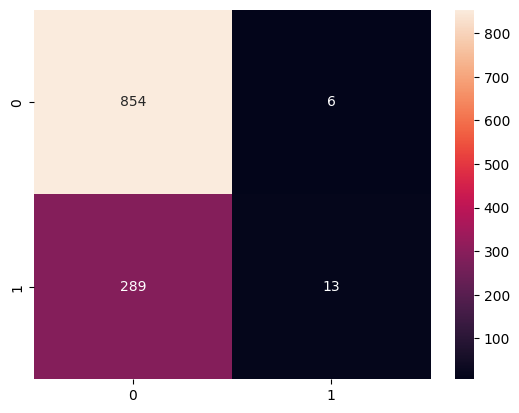

In [58]:
sns.heatmap(cm, annot=True, fmt='')

In [59]:
def evaluate_classes_accuracy(cm):
    print(f'Class 0 accuracy: {cm[0][0] / sum(cm[0])}')
    print(f'Class 1 accuracy: {cm[1][1] / sum(cm[1])}')

In [60]:
evaluate_classes_accuracy(cm)

Class 0 accuracy: 0.9930232558139535
Class 1 accuracy: 0.04304635761589404


### Undersampling

In [62]:
tl = TomekLinks(sampling_strategy='majority')
X_us, y_us = tl.fit_resample(X, y)

In [63]:
X_us.shape, y_us.shape

((5417, 74), (5417,))

In [64]:
np.unique(y_us, return_counts=True)

(array([0, 1]), array([3910, 1507]))

In [65]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X_us, y_us, test_size=0.2, stratify=y_us)
X_train_us.shape, X_test_us.shape


((4333, 74), (1084, 74))

In [66]:
rf_us = RandomForestClassifier()
rf_us.fit(X_train_us, y_train_us)

RandomForestClassifier()

In [68]:
y_pred_us = rf_us.predict(X=X_test_us)
accuracy_score(y_true=y_test_us, y_pred=y_pred_us)

0.7333948339483395

In [69]:
cm_us = confusion_matrix(y_true=y_test_us, y_pred=y_pred_us)
cm

array([[854,   6],
       [289,  13]])

<AxesSubplot: >

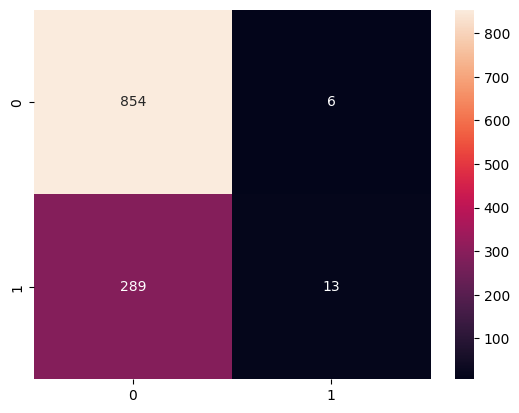

In [70]:
sns.heatmap(data=cm, annot=True, fmt='')

In [71]:
evaluate_classes_accuracy(cm_us)

Class 0 accuracy: 0.9808184143222506
Class 1 accuracy: 0.09271523178807947


### Oversampling

In [72]:
smote = SMOTE(sampling_strategy='minority')
X_ov, y_ov = smote.fit_resample(X, y)

In [73]:
X_ov.shape, y_ov.shape

((8598, 74), (8598,))

In [74]:
np.unique(y_ov, return_counts=True)

(array([0, 1]), array([4299, 4299]))

In [75]:
X_train_ov, X_test_ov, y_train_ov, y_test_ov = train_test_split(X_ov, y_ov, test_size=0.2, stratify=y_ov)

In [76]:
X_train_ov.shape, y_test_ov.shape

((6878, 74), (1720,))

In [77]:
rf_ov = RandomForestClassifier()
rf_ov.fit(X=X_train_ov, y=y_train_ov)

RandomForestClassifier()

In [79]:
y_pred_ov = rf_ov.predict(X=X_test_ov)
accuracy_score(y_true=y_test_ov, y_pred=y_pred_ov)

0.8104651162790698

In [80]:
cm_ov = confusion_matrix(y_true=y_test_ov, y_pred=y_pred_ov)
cm_ov

array([[700, 160],
       [166, 694]])

<AxesSubplot: >

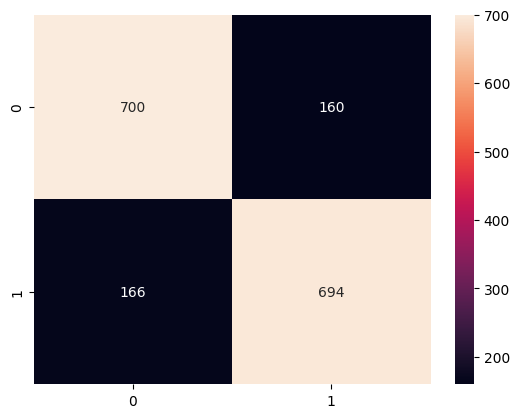

In [81]:
sns.heatmap(cm_ov, annot=True, fmt='')

In [82]:
evaluate_classes_accuracy(cm_ov)

Class 0 accuracy: 0.813953488372093
Class 1 accuracy: 0.8069767441860465
